In [1]:
import pandas as pd
from sklearn.svm import SVC

In [26]:
X=pd.read_csv("irisX.csv",header=None)
X.head()

0    1    2    3
0  5.2  2.7  3.9  1.4
1  5.8  2.7  5.1  1.9
2  5.0  2.0  3.5  1.0
3  6.4  2.9  4.3  1.3
4  5.0  3.5  1.6  0.6

In [3]:
X_first_two=X.iloc[:,0:2]
X_first_two.head()

0    1
0  5.2  2.7
1  5.8  2.7
2  5.0  2.0
3  6.4  2.9
4  5.0  3.5

In [30]:
y=pd.read_csv("irisY.csv",header=None)
y.head()

0
0  1
1  2
2  1
3  1
4  0

In [31]:
y=y[0]

## Train-test Split

In [6]:
X_train=X_first_two.iloc[:100,:]
X_test=X_first_two.iloc[100:,:]
print(X_train.shape,X_test.shape)

(100, 2) (50, 2)


In [7]:
y_train=y[:100]
y_test=y[100:]
print(y_train.shape,y_test.shape)

(100,) (50,)


# RBF-kernel, gamma=0.5, one-vs-rest classifier

### C=0.01

In [8]:
clf0=SVC(kernel="rbf",C=0.01,gamma=0.5)
clf0.fit(X_train,y_train)

SVC(C=0.01, gamma=0.5)

In [9]:
clf0.score(X_test,y_test) #Accuracy

0.32

In [11]:
print(len(clf0.support_vectors_)) #Support Vector

100


### C=1

In [13]:
clf1=SVC(kernel="rbf",C=1,gamma=0.5)
clf1.fit(X_train,y_train)

SVC(C=1, gamma=0.5)

In [14]:
clf1.score(X_test,y_test) #Accuracy

0.88

In [15]:
print(len(clf1.support_vectors_)) #Support Vector

69


## C=10

In [16]:
clf2=SVC(kernel="rbf",C=10,gamma=0.5)
clf2.fit(X_train,y_train)

SVC(C=10, gamma=0.5)

In [17]:
clf2.score(X_test,y_test) #Accuracy

0.84

In [18]:
print(len(clf2.support_vectors_)) #Support Vector

57


 ## Visualization

In [43]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

In [32]:
X=X_first_two.values
print("type(X)= ", type(X))
y=y.values
print("type(y)= ", type(y))

type(X)=  <class 'numpy.ndarray'>
type(y)=  <class 'numpy.ndarray'>


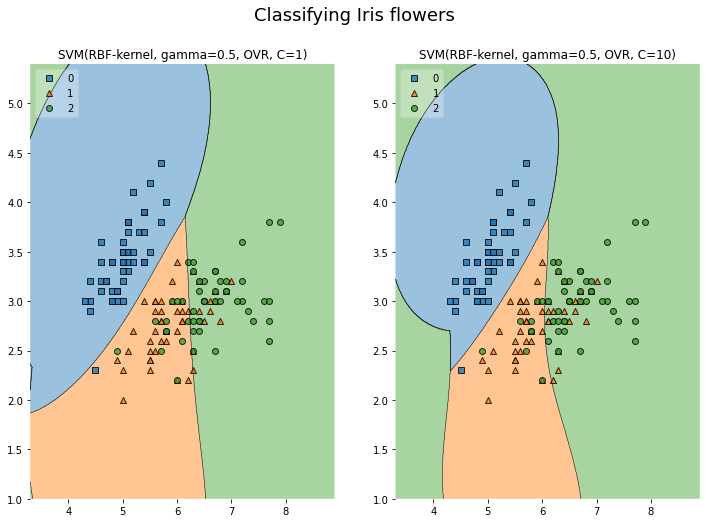

In [61]:
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(12, 8))
fig.suptitle("Classifying Iris flowers",fontsize=18)


ax = plt.subplot(gs[0,0])
fig=plot_decision_regions(X=X,y=y,clf=clf1,legend=2)
plt.title("SVM(RBF-kernel, gamma=0.5, OVR, C=1)")

ax = plt.subplot(gs[0,1])
fig=plot_decision_regions(X=X,y=y,clf=clf2,legend=2)
plt.title("SVM(RBF-kernel, gamma=0.5, OVR, C=10)")
plt.show()